In [1]:
import matplotlib.pyplot as pl
import xarray as xr
import numpy as np
from datetime import datetime, timedelta

pl.rcParams['xtick.labelsize'] = 12
pl.rcParams['ytick.labelsize'] = 12
pl.rcParams['axes.labelsize'] = 16

output1=xr.open_dataset('/fs/ess/PFS0220/eurec4a/microhh_results/eurec4a_feb2_512_100m_12kmtop.nc',decode_times=True)
output2=xr.open_dataset('/fs/ess/PFS0220/eurec4a/SAM_results/EUREC4A_2Feb_512sqx160_100m_SAM_kc.nc',decode_times=True)
output3=xr.open_dataset('/fs/ess/PFS0220/eurec4a/forcings/eurec4a_20200202_narenpitak_extended.kpt_inversion.nc',decode_times=True)


new_coords = xr.DataArray(output2['zf'].values, dims='height')
output2=output2.assign_coords({'height':new_coords})


output3=output3.rename({'sfc_sens_flx':'hfss','sfc_lat_flx':'hfls','open_sst':'ts','q':'qv','cloud_fraction':'flc','u':'ua','v':'va','msnswrf':'rss','msnlwrf':'rls','mtnswrf':'rst'})
output3['hfss']=output3['hfss']*-1; output3['hfls']=output3['hfls']*-1; output3['wspd']=np.sqrt((output3['ua'].isel(nlev=248))**2+(output3['va'].isel(nlev=248))**2)

if 'height_f' in output3.keys():
    new_coords = xr.DataArray(output3['height_f'].isel(time=0).values, dims='nlev')
else:
    new_coords = xr.DataArray(output3['zf'].isel(time=0).values, dims='nlev')
output3=output3.assign_coords({'nlev':new_coords})

output = {'MicroHH':output1,'SAM':output2}
output_3hr={'MicroHH':output1.resample(time='3H').mean(),'SAM':output2.resample(time='3H').mean()}
output_withERA5 = {'MicroHH':output1,'ERA5':output3,'SAM':output2}
output_3hr_withERA5={'MicroHH':output1.resample(time='3H').mean(),'ERA5':output3,'SAM':output2.resample(time='3H').mean()}

vars=['lwp','ps','pr']
vars_withERA5=['hfss','hfls','ts','wspd','rss','rls','rst']



def plot_1d(varname):
    pl.figure(figsize=(5, 5))
    for key in output:
        output[key][varname].plot.line(label=key)
    pl.legend(loc="upper center")
    pl.title(varname)

def plot_1d_withERA5(varname):
    pl.figure(figsize=(5, 5))
    for key in output_withERA5:
        output_withERA5[key][varname].plot.line(label=key)
    pl.legend(loc="upper center")
    pl.title(varname)

def plot_1d_from2d(varname,level):
    pl.figure()
    for key in output:
        (output[key].sel(zf=level))[varname].plot.line(label=key)
    pl.legend(loc="upper center")
    pl.title(varname)

def plot_1d_timeavg(varname,with_ERA5=False):
    max_ht=130
    if with_ERA5:
        xr_data=output_3hr_withERA5
    else:   
        xr_data=output_3hr
    #start_time = datetime.fromisoformat(start_time)
    fig, axs = pl.subplots(nrows=4, ncols=2, figsize=(20, 20))
    axs = axs.flatten()
    for i in range(0,8):
        #time=start_time+timedelta(hours=i)
        for key in xr_data:
            if key=='SAM':
                xr_data[key][varname].isel(time=20+i,height=slice(0,max_ht)).plot.line(y='height',label=key,ax=axs[i])
            elif key=='MicroHH':
                xr_data[key][varname].isel(time=28+i,zf=slice(0,max_ht)).plot.line(y='zf',label=key,ax=axs[i])
                axs[i].set_title(xr_data[key]['time'].isel(time=28+i).dt.strftime('%d%m%y%H').values)
            else:
                xr_data[key][varname].isel(time=84+(3*i),nlev=slice(max_ht,249)).plot.line(y='nlev',label=key,ax=axs[i])
        axs[i].legend(loc="upper right")
        if i!=6 and i!=7:
            axs[i].set_xlabel('')

def plot_2d(varname,level,low_value,high_value):
    fig, axs = pl.subplots(nrows=2, ncols=1, figsize=(10, 10))
    axs = axs.flatten()
    i=0;
    for key in output:
        levs=np.linspace(low_value,high_value,10)
        print(output[key]['zf'].max().values)
        if output[key]['zf'].max().values>level:
            max_ht=np.nonzero((output[key]['zf'].values[:]>level))[0][0]
        else:
            max_ht=output[key]['zf'].size
        #max_ht=130
        if key=='SAM':
            output[key][varname].where(output[key][varname]!=0,np.nan).isel(height=slice(0,max_ht)).transpose().plot.contourf(levels=levs,ax=axs[i])
        else:
            output[key][varname].where(output[key][varname]!=0,np.nan).isel(time=slice(288,None),zf=slice(0,max_ht)).transpose().plot.contourf(levels=levs,ax=axs[i])
            axs[i].set_xlabel('')
        axs[i].set_title(key)
        i=i+1;



#for var in vars_withERA5:
#    plot_1d_withERA5(var)

#plot_2d('ua',10000.,-80,80)

#plot_1d_timeavg('qlc',with_ERA5=False)
#plot_1d_from2d('rhoa',10)

#for var in vars:
#    plot_1d(var)

12138.0
12889.0


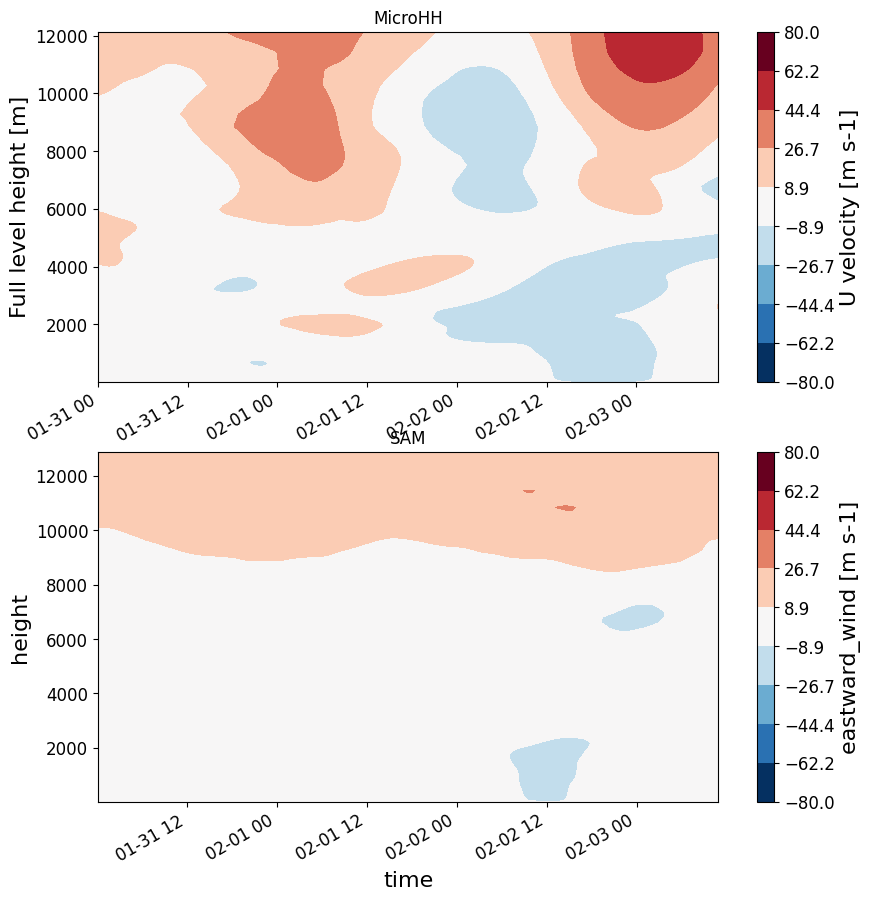

In [2]:

plot_2d('ua',15000.,-80,80)

#for var in vars_withERA5:
#    plot_1d_withERA5(var)

<xarray.Dataset>
Dimensions:               (time: 1284, zf: 159, zh: 160, p_rad: 141,
                           era_layers: 140, era_levels: 141)
Coordinates:
  * time                  (time) datetime64[ns] 2020-01-30 ... 2020-02-03T10:...
  * zf                    (zf) float32 10.0 30.0 52.0 ... 1.146e+04 1.214e+04
  * zh                    (zh) float32 0.0 20.0 41.0 ... 1.18e+04 1.289e+04
  * p_rad                 (p_rad) float32 1.019e+05 9.626e+04 ... 3.71 3.397
Dimensions without coordinates: era_layers, era_levels
Data variables: (12/198)
    iter                  (time) int32 ...
    area                  (time, zf) float32 ...
    areah                 (time, zh) float32 ...
    ua                    (time, zf) float32 ...
    u_3                   (time, zf) float32 ...
    u_4                   (time, zf) float32 ...
    ...                    ...
    rls                   (time) float32 -77.9 -77.88 -77.87 ... -69.81 -69.77
    rsds                  (time) float32 ...
    rsus                  (time) float32 ...
    rss                   (time) float32 0.0 0.0 0.0 0.0 ... 45.42 61.26 77.92
    hfss                  (time) float32 11.29 10.11 9.735 ... 4.345 4.309 4.266
    hfls                  (time) float64 125.5 114.4 109.6 ... 80.97 80.11 79.21

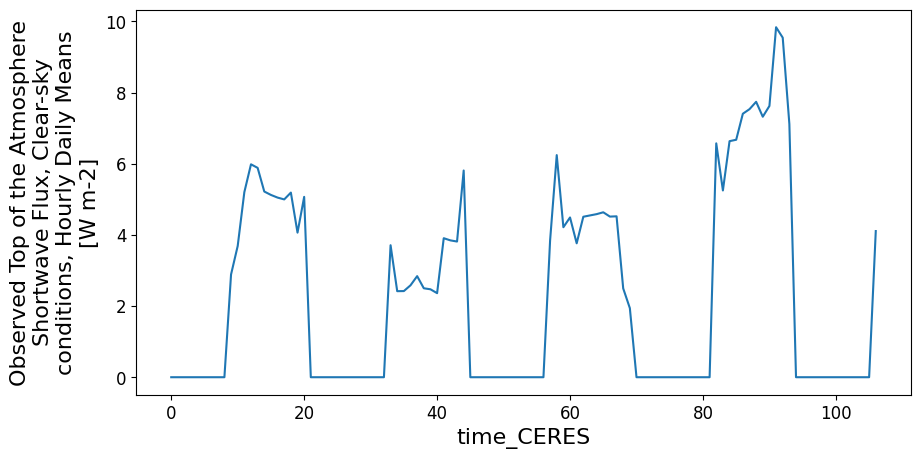

In [15]:
ds=xr.open_dataset('/fs/ess/PFS0220/eurec4a/dropsondes/test_Lagtraj_2Feb_2deg_ECMWF_CSU_WithObs.nc',decode_times=True)
mHH=xr.open_dataset('/fs/ess/PFS0220/eurec4a/microhh_results/eurec4a_feb2_512_100m_12kmtop.nc',decode_times=False)
SAM=xr.open_dataset('/fs/ess/PFS0220/eurec4a/SAM_results/EUREC4A_2Feb_512sqx160_100m_SAM_kc.nc',decode_times=False)


fig,ax=pl.subplots(1,1,figsize=(10,5))
ds.toa_sw_clr_CERES_mean.plot()
#ds.fsntcERA.plot()
#mHH.rst.plot()
#SAM.rst.plot()
#ax.invert_yaxis()
#plot_2d('ta',5000.,200,310)

output['MicroHH']

In [ ]:
import datetime
import numpy as np
import eurec4a
%matplotlib inline
import matplotlib.pyplot as plt
import pathlib
plt.style.use(pathlib.Path("./mplstyle/book"))

def dt64_to_dt(dt64):
    epoch = np.datetime64('1970-01-01T00:00:00')
    second = np.timedelta64(1, 's')
    return datetime.datetime.utcfromtimestamp(int((dt64 - epoch) / second))

fig, (ax0, ax1) = plt.subplots(1, 2)

y = ds_sondes_first_circle_Feb05.alt

x0 = ds_sondes_first_circle_Feb05.ta.transpose("alt", "sonde_id")
ax0.set_prop_cycle(color=plt.cm.viridis(np.linspace(0, 1, len(dropsonde_ids))))
ax0.plot(x0, y.data[:, np.newaxis])
ax0.set_xlabel(f"{x0.long_name} / {x0.units}")
ax0.set_ylabel(f"{y.name} / m")
ax0.legend([dt64_to_dt(d).strftime("%H:%M:%S")
            for d in ds_sondes_first_circle_Feb05.launch_time],
           title=x0.launch_time.name)

x1 = ds_sondes_first_circle_Feb05.rh.transpose("alt", "sonde_id")
ax1.set_prop_cycle(color=plt.cm.viridis(np.linspace(0, 1, len(dropsonde_ids))))
ax1.plot(x1, y.data[:, np.newaxis])
ax1.set_xlabel(f"{x1.long_name} / {x1.units}")
ax1.set_ylabel(f"{y.name} / m")
ax1.legend(ds_sondes_first_circle_Feb05.sonde_id.values,
           title="sonde_id")

fig.suptitle('Dropsondes from 1st circle an February 5', fontsize=18)